In [1]:
import sys
import math
import random
import itertools
from gurobipy import *

n = 25

# Create n random points

random.seed(1)
points = [(random.randint(0,100),random.randint(0,100)) for i in range(n)]

# Dictionary of Euclidean distance between each pair of points

my_dist = [[math.sqrt(sum((points[i][k]-points[j][k])**2 for k in range(2)))
    for i in range(n)] for j in range(n)]
    
dist={(i,j) :math.sqrt(sum((points[i][k]-points[j][k])**2 for k in range(2)))
    for i in range(n) for j in range(i)}

cities = [[i,points[i][0], points[i][1]] for i in range(len(points))]
print("Model Data Created")


Model Data Created


In [4]:
#!/usr/bin/python

# Copyright 2019, Gurobi Optimization, LLC

# Solve a traveling salesman problem on a randomly generated set of
# points using lazy constraints.   The base MIP model only includes
# 'degree-2' constraints, requiring each node to have exactly
# two incident edges.  Solutions to this model may contain subtours -
# tours that don't visit every city.  The lazy constraint callback
# adds new constraints to cut them off.



# Callback - use lazy constraints to eliminate sub-tours

def subtourelim(model, where):
    if where == GRB.Callback.MIPSOL:
        # make a list of edges selected in the solution
        vals = model.cbGetSolution(model._vars)
        selected = tuplelist((i,j) for i,j in model._vars.keys() if vals[i,j] > 0.5)
        # find the shortest cycle in the selected edge list
        tour = subtour(selected)
        if len(tour) < n:
            # add subtour elimination constraint for every pair of cities in tour
            model.cbLazy(quicksum(model._vars[i,j]
                                  for i,j in itertools.combinations(tour, 2))
                         <= len(tour)-1)


# Given a tuplelist of edges, find the shortest subtour

def subtour(edges):
    unvisited = list(range(n))
    cycle = range(n+1) # initial length has 1 more city
    while unvisited: # true if list is non-empty
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i,j in edges.select(current,'*') if j in unvisited]
        if len(cycle) > len(thiscycle):
            cycle = thiscycle
    return cycle

## Simulated Annealing

In [2]:
from satsp import solver

cities = [[i,points[i][0], points[i][1]] for i in range(len(points))]

solver.Solve(cities)
solver.PrintSolution()


Simulated Annealing starts with parameters:
Initial Temperature:  334.052742183571
Cooling Rate:  0.99
Initial Epoch Length:  100
Stopping Criterion: No Improvement for 100 epochs

Epoch  1
Temperature:  334.052742183571
Epoch Length:  100
Current Dist:  1467.0331641966368
Best Dist:  1067.8498940178506
Epoch  2
Temperature:  330.7122147617353
Epoch Length:  100
Current Dist:  1638.7002077668972
Best Dist:  1067.8498940178506
Epoch  3
Temperature:  327.40509261411796
Epoch Length:  100
Current Dist:  1369.6590670686855
Best Dist:  1067.8498940178506
Epoch  4
Temperature:  324.1310416879768
Epoch Length:  100
Current Dist:  1571.0266028890912
Best Dist:  1067.8498940178506
Epoch  5
Temperature:  320.889731271097
Epoch Length:  100
Current Dist:  1364.5991042047303
Best Dist:  1067.8498940178506
Epoch  6
Temperature:  317.680833958386
Epoch Length:  100
Current Dist:  1262.1801184782037
Best Dist:  1067.8498940178506
Epoch  7
Temperature:  314.50402561880213
Epoch Length:  100
Current Di

Best Dist:  1038.0606483647125
Epoch  66
Temperature:  173.82117846056747
Epoch Length:  100
Current Dist:  1545.679799594155
Best Dist:  1038.0606483647125
Epoch  67
Temperature:  172.08296667596179
Epoch Length:  100
Current Dist:  1335.1456387475364
Best Dist:  1038.0606483647125
Epoch  68
Temperature:  170.36213700920217
Epoch Length:  100
Current Dist:  1657.3750900880218
Best Dist:  1038.0606483647125
Epoch  69
Temperature:  168.65851563911013
Epoch Length:  100
Current Dist:  1410.04611565918
Best Dist:  1038.0606483647125
Epoch  70
Temperature:  166.97193048271905
Epoch Length:  100
Current Dist:  1303.6251393989703
Best Dist:  1038.0606483647125
Epoch  71
Temperature:  165.30221117789185
Epoch Length:  100
Current Dist:  1239.0333330019812
Best Dist:  1038.0606483647125
Epoch  72
Temperature:  163.64918906611294
Epoch Length:  100
Current Dist:  1226.4993781090618
Best Dist:  1038.0606483647125
Epoch  73
Temperature:  162.01269717545182
Epoch Length:  100
Current Dist:  1518.9

Temperature:  84.30177152426045
Epoch Length:  100
Current Dist:  1298.9444019005468
Best Dist:  917.5921272897979
Epoch  139
Temperature:  83.45875380901784
Epoch Length:  100
Current Dist:  1248.9625672039674
Best Dist:  917.5921272897979
Epoch  140
Temperature:  82.62416627092766
Epoch Length:  100
Current Dist:  1268.8450032732585
Best Dist:  917.5921272897979
Epoch  141
Temperature:  81.79792460821838
Epoch Length:  100
Current Dist:  1398.7493527121705
Best Dist:  917.5921272897979
Epoch  142
Temperature:  80.97994536213619
Epoch Length:  100
Current Dist:  1409.7954840114528
Best Dist:  917.5921272897979
Epoch  143
Temperature:  80.17014590851483
Epoch Length:  100
Current Dist:  1181.4665757417824
Best Dist:  917.5921272897979
Epoch  144
Temperature:  79.36844444942967
Epoch Length:  100
Current Dist:  1318.3112798982875
Best Dist:  917.5921272897979
Epoch  145
Temperature:  78.57476000493537
Epoch Length:  100
Current Dist:  1312.2206111638598
Best Dist:  917.5921272897979
Epo

Epoch  212
Temperature:  40.07200761749748
Epoch Length:  100
Current Dist:  1344.1282646390507
Best Dist:  815.1167030847644
Epoch  213
Temperature:  39.671287541322506
Epoch Length:  100
Current Dist:  992.0795870086749
Best Dist:  815.1167030847644
Epoch  214
Temperature:  39.274574665909284
Epoch Length:  100
Current Dist:  1297.5689138755497
Best Dist:  815.1167030847644
Epoch  215
Temperature:  38.88182891925019
Epoch Length:  100
Current Dist:  1208.1175131630323
Best Dist:  815.1167030847644
Epoch  216
Temperature:  38.49301063005769
Epoch Length:  100
Current Dist:  1204.722751997508
Best Dist:  815.1167030847644
Epoch  217
Temperature:  38.10808052375711
Epoch Length:  100
Current Dist:  1058.2995337260654
Best Dist:  815.1167030847644
Epoch  218
Temperature:  37.72699971851954
Epoch Length:  100
Current Dist:  1139.5255254223305
Best Dist:  815.1167030847644
Epoch  219
Temperature:  37.34972972133434
Epoch Length:  100
Current Dist:  1118.7927344195614
Best Dist:  815.116703

Epoch  292
Temperature:  17.93315363095037
Epoch Length:  100
Current Dist:  1052.6722921060039
Best Dist:  681.5488198672399
Epoch  293
Temperature:  17.753822094640864
Epoch Length:  100
Current Dist:  1055.2640634284005
Best Dist:  681.5488198672399
Epoch  294
Temperature:  17.576283873694454
Epoch Length:  100
Current Dist:  832.8742281086866
Best Dist:  681.5488198672399
Epoch  295
Temperature:  17.40052103495751
Epoch Length:  100
Current Dist:  834.7392884214795
Best Dist:  681.5488198672399
Epoch  296
Temperature:  17.226515824607937
Epoch Length:  100
Current Dist:  827.0656407414195
Best Dist:  681.5488198672399
Epoch  297
Temperature:  17.054250666361856
Epoch Length:  100
Current Dist:  832.0532778139772
Best Dist:  681.5488198672399
Epoch  298
Temperature:  16.883708159698237
Epoch Length:  100
Current Dist:  995.503232659483
Best Dist:  681.5488198672399
Epoch  299
Temperature:  16.714871078101254
Epoch Length:  100
Current Dist:  829.1200412900541
Best Dist:  681.5488198

Epoch  384
Temperature:  7.1136840445545655
Epoch Length:  100
Current Dist:  595.5250654168873
Best Dist:  543.3171594078665
Epoch  385
Temperature:  7.042547204109019
Epoch Length:  100
Current Dist:  585.6514370359948
Best Dist:  543.3171594078665
Epoch  386
Temperature:  6.972121732067929
Epoch Length:  100
Current Dist:  592.2023935871543
Best Dist:  543.3171594078665
Epoch  387
Temperature:  6.90240051474725
Epoch Length:  100
Current Dist:  603.8322927916606
Best Dist:  543.3171594078665
Epoch  388
Temperature:  6.833376509599778
Epoch Length:  100
Current Dist:  567.7891123853414
Best Dist:  543.3171594078665
Epoch  389
Temperature:  6.76504274450378
Epoch Length:  100
Current Dist:  541.7109091661081
Best Dist:  539.6946766060206
Epoch  390
Temperature:  6.697392317058742
Epoch Length:  100
Current Dist:  542.5971986112547
Best Dist:  539.6946766060206
Epoch  391
Temperature:  6.630418393888155
Epoch Length:  100
Current Dist:  555.129781372165
Best Dist:  531.6052130539557
Ep

Epoch  483
Temperature:  2.6301398241477996
Epoch Length:  100
Current Dist:  511.3927290882277
Best Dist:  507.2682862335082
Epoch  484
Temperature:  2.6038384259063214
Epoch Length:  100
Current Dist:  511.936528746233
Best Dist:  507.2682862335082
Epoch  485
Temperature:  2.5778000416472584
Epoch Length:  100
Current Dist:  511.936528746233
Best Dist:  507.2682862335082
Epoch  486
Temperature:  2.552022041230786
Epoch Length:  100
Current Dist:  511.9365287462331
Best Dist:  507.2682862335082
Epoch  487
Temperature:  2.526501820818478
Epoch Length:  100
Current Dist:  511.9365287462331
Best Dist:  507.2682862335082
Epoch  488
Temperature:  2.5012368026102934
Epoch Length:  100
Current Dist:  511.936528746233
Best Dist:  507.2682862335082
Epoch  489
Temperature:  2.4762244345841906
Epoch Length:  100
Current Dist:  512.8898462488892
Best Dist:  507.2682862335082
Epoch  490
Temperature:  2.451462190238349
Epoch Length:  100
Current Dist:  512.8898462488892
Best Dist:  507.268286233508

<Figure size 640x480 with 1 Axes>

Best TSP tour:  [0, 7, 8, 18, 16, 2, 15, 14, 1, 6, 13, 19, 5, 24, 12, 4, 23, 9, 17, 10, 3, 20, 22, 11, 21]


<Figure size 640x480 with 1 Axes>

In [4]:
solver.GetBestDist()

833.1549361038734

Best TSP tour length:  833.1549361038734


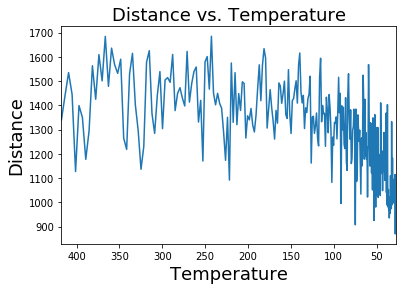

Best TSP tour:  [0, 9, 3, 22, 11, 8, 16, 4, 1, 24, 13, 19, 2, 12, 23, 17, 5, 6, 15, 14, 20, 10, 7, 18, 21]


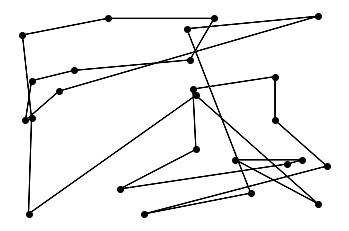

In [5]:
solver.PrintSolution()

## IP Only

In [5]:
m2 = Model()

# Create variables
vars = m2.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')
for i,j in vars.keys():
    vars[j,i] = vars[i,j] # edge in opposite direction
    
# Add degree-2 constraint
m2.addConstrs(vars.sum(i,'*') == 2 for i in range(n))

# Optimize model
m2._vars = vars
m2.Params.lazyConstraints = 1
m2.optimize(subtourelim)

vals = m2.getAttr('x', vars)
selected = tuplelist((i,j) for i,j in vals.keys() if vals[i,j] > 0.5)

tour = subtour(selected)
assert len(tour) == n

print('')
print('Optimal tour: %s' % str(tour))
print('Optimal cost: %g' % m2.objVal)
print('')

Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 25 rows, 300 columns and 600 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 1306.5030272
Presolve time: 0.01s
Presolved: 25 rows, 300 columns, 600 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)

Root relaxation: objective 4.738647e+02, 38 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  473.86465    0    6 1306.50303  473.86465  63.7%     -    0s
     0     0  493.69072    0    6 1306.50303  493.69072  62.2%     -    0s
H    0     0                     805.9587072  493.69072  38.7%     -    0s
     0     0  496.13

## IP + Simulated Annealing Starting Solution

In [6]:
m = Model()

# Create variables

vars = m.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')
for i,j in vars.keys():
    vars[j,i] = vars[i,j] # edge in opposite direction

# Add degree-2 constraint
m.addConstrs(vars.sum(i,'*') == 2 for i in range(n))

# Find Solution with Simulated Annealing
#solver.Solve(cities, screen_output=False)

sa_sol = solver.GetBestTour()
## Provide initial solution
for i in range(len(cities)-1):
    vars[sa_sol[i],sa_sol[i+1]].start = 1.0

vars[sa_sol[len(cities)-1],sa_sol[0]].start = 1.0  

# Optimize model
m._vars = vars
m.Params.lazyConstraints = 1
m.optimize(subtourelim)

vals = m.getAttr('x', vars)
selected = tuplelist((i,j) for i,j in vals.keys() if vals[i,j] > 0.5)

tour = subtour(selected)
assert len(tour) == n

print('')
print('Optimal tour: %s' % str(tour))
print('Optimal cost: %g' % m.objVal)
print('')

Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 25 rows, 300 columns and 600 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]

MIP start produced solution with objective 511.937 (0.01s)
Loaded MIP start with objective 511.937

Presolve time: 0.00s
Presolved: 25 rows, 300 columns, 600 nonzeros
Variable types: 0 continuous, 300 integer (300 binary)

Root relaxation: objective 4.738647e+02, 38 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  473.86465    0    6  511.93653  473.86465  7.44%     -    0s
     0     0  493.69072    0    6  511.93653  493.69072  3.56%     -    0s
     0     0  493.69072    0    6  511.9365